# Statistical exploration of NSF grants dataset

In [1]:
#basic functionality 
from os import listdir
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime as dt

#processing data
import xmltodict
import pandas as pd
import pickle
import seaborn as sns

#article datamining 
import habanero as hb
import metapub as mp

import plotly
plotly.offline.init_notebook_mode()


%matplotlib nbagg

In [2]:
#load the data
df = pd.read_pickle('NSFdata2009-2015full')

with open('NSFcrossref2009-2015', 'rb') as handle:
    ad = pickle.load(handle)

## 1. Overall data

In [3]:
bycountry = df.groupby('Institution_Country').Amount.sum()

In [4]:
print( ' USA accounts for ', '{0:.2f}'.format(bycountry['United States']/bycountry.sum()*100),'% of total NSF grant spedning in 2009-2015') 

 USA accounts for  99.53 % of total NSF grant spedning in 2009-2015


In [ ]:
#only consider USA for now 

### Plot geographical distribution of funding

In [5]:
bystate = df[df.Institution_Country == 'United States'].groupby('Institution_State').Amount.sum()
bystate.sort_values(inplace = True, ascending=False)

In [6]:
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(158,154,200)'],[0.4, 'rgb(117,107,177)'],\
            [0.6, 'rgb(84,39,143)'],[0.8, 'rgb(50,20,113)'],[1.0, 'rgb(30,0,83)']]

In [7]:
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = bystate.index,
        z = bystate.values,
        locationmode = 'USA-states',
        #text = bystate.values.astype('str'),
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "USD"
        )
    ) ]

In [8]:
layout = dict(
        title = '2009-2015 NSF Grants by state',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

In [9]:
fig = dict(data=data, layout=layout)

In [10]:
plotly.offline.iplot(fig)

### Sorted barplot of geographical distribution

<IPython.core.display.Javascript object>


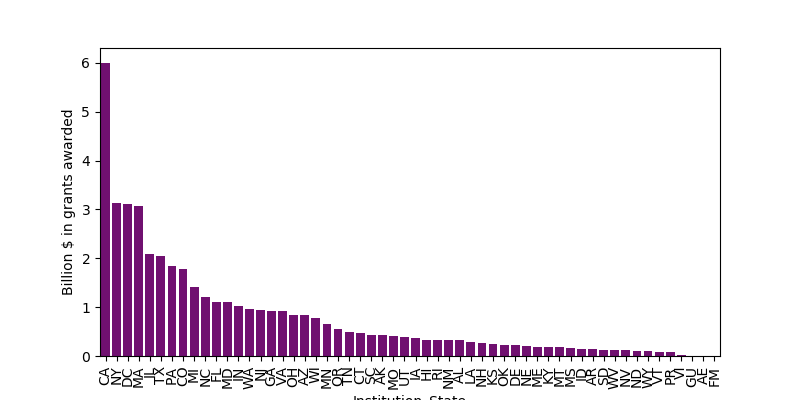

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [11]:
fig100 = plt.figure(100, figsize = (8,4))
ax1 = sns.barplot(x = bystate.index, y = bystate.values, color='Purple')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
ax1.set_ylabel('Billion $ in grants awarded')
ax1.set_yticklabels(['0', '1', '2', '3', '4', '5', '6']);

### Sorted barplot of directorate funding 

In [12]:
bydir = df.groupby('Directorate').sum().reset_index()
bydir.sort_values(by = 'Amount', inplace=True, ascending=False)

<IPython.core.display.Javascript object>


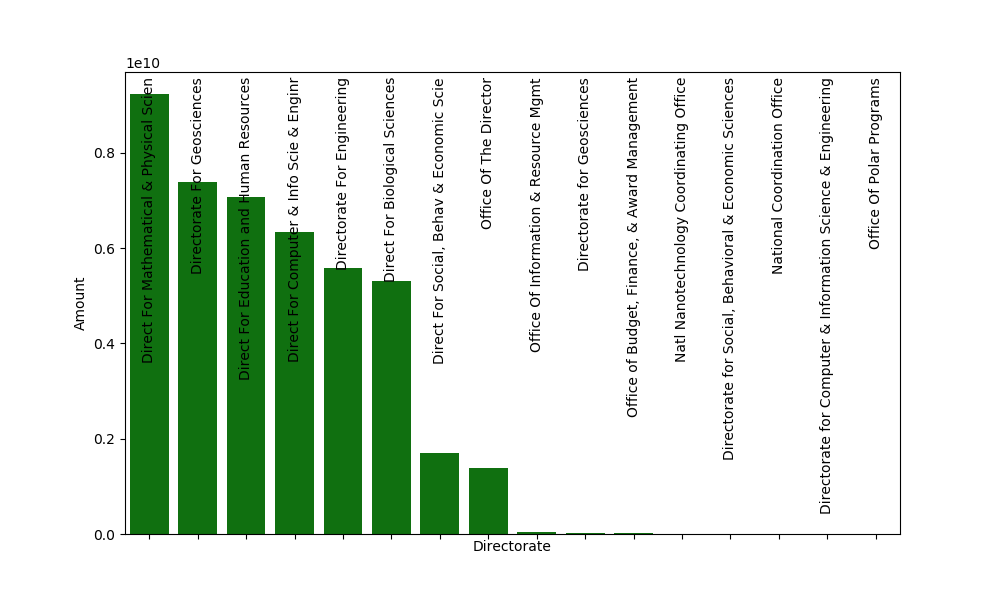

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [13]:
fig101 = plt.figure(101, figsize = (10,6))
ax1 = sns.barplot(x = 'Directorate', y = 'Amount', data = bydir, color='Green')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

### Directorate funding and total publications

<IPython.core.display.Javascript object>


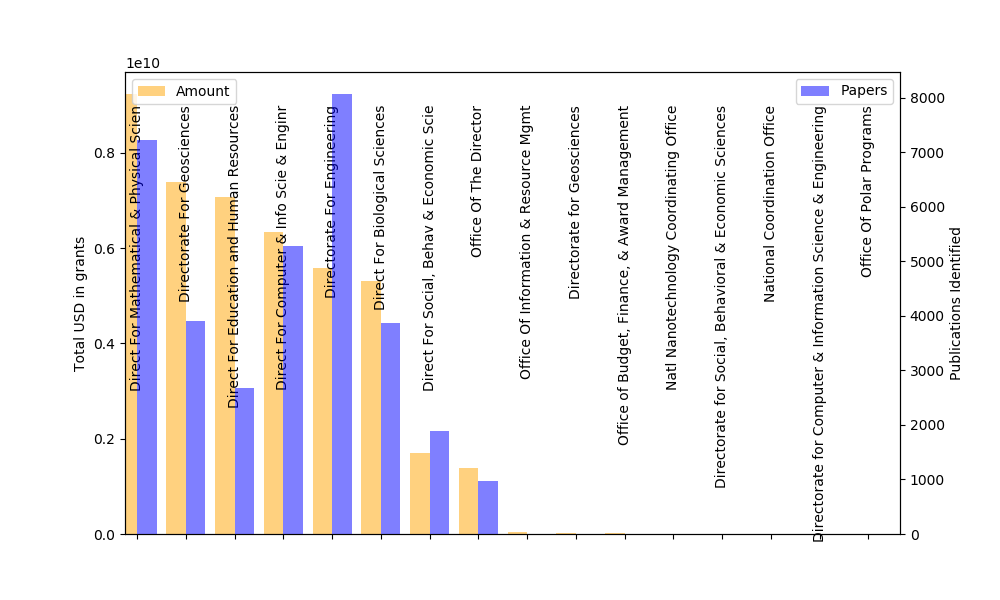

In [14]:
fig102 = plt.figure(102, figsize = (10,6))
ax = fig102.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
#sns.barplot(x = byyearA.index, y = byyearA.values, ax = ax)
#sns.barplot(x = byyearP.index, y = byyearP.values, ax = ax2)
bydir.Amount.plot(kind='bar', color='orange', ax=ax, width=0.4, position=1,  alpha=0.5)
bydir.Papers_funded.plot(kind='bar', color='blue', ax=ax2, width=0.4, position=0, alpha=0.5)
ax.set_ylabel('Total USD in grants')
ax2.set_ylabel('Publications Identified')
ax.legend(['Amount'], loc = 2)
ax2.legend(['Papers'], loc = 1)
ax.set_xticklabels(bydir.Directorate)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(0.95)

### Directorate cost per paper

In [15]:
bydir['Cost'] = bydir.Amount/bydir.Papers_funded

In [16]:
bydir.sort_values(by = 'Cost', inplace=True)

<IPython.core.display.Javascript object>


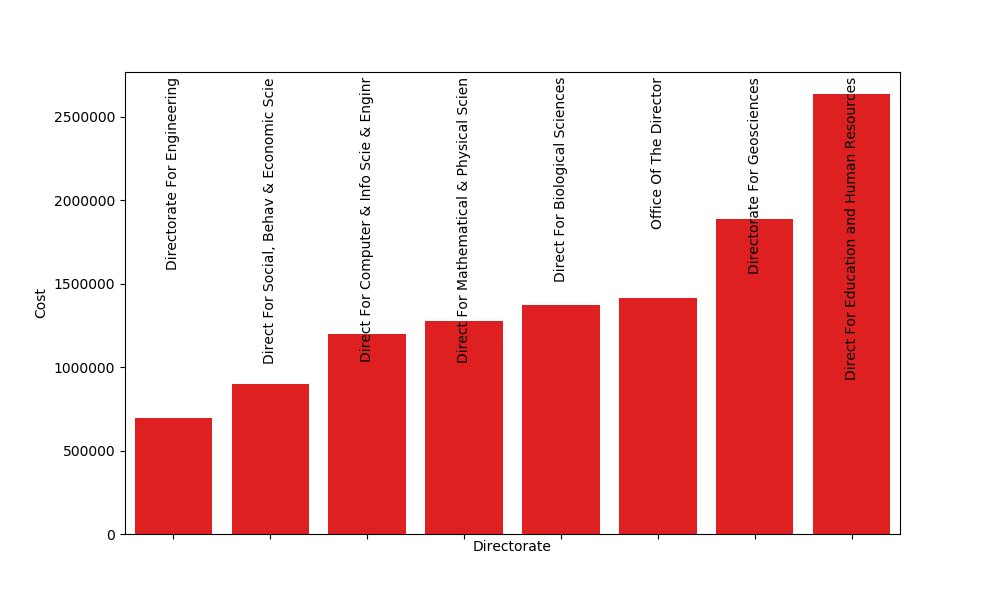

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [17]:
fig103 = plt.figure(103, figsize = (10,6))
ax1 = sns.barplot(x = 'Directorate', y = 'Cost', data = bydir[bydir.Papers_funded > 1], color='Red')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

<IPython.core.display.Javascript object>


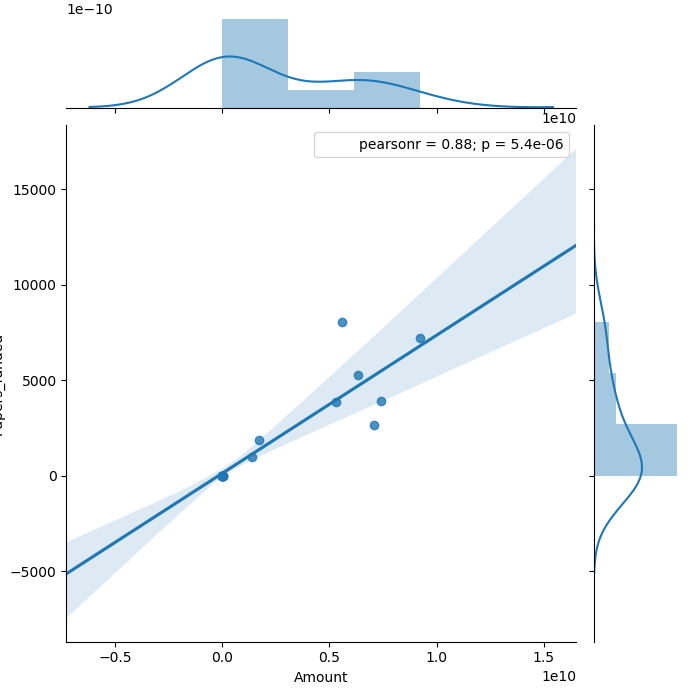

In [18]:
sns.jointplot(x="Amount", y="Papers_funded", data=bydir, size=7, kind='reg')

### Sorted barplot of division funding

In [19]:
bydiv = df.groupby('Division').sum().reset_index()
bydiv.sort_values(by = 'Amount', inplace=True, ascending=False)

<IPython.core.display.Javascript object>


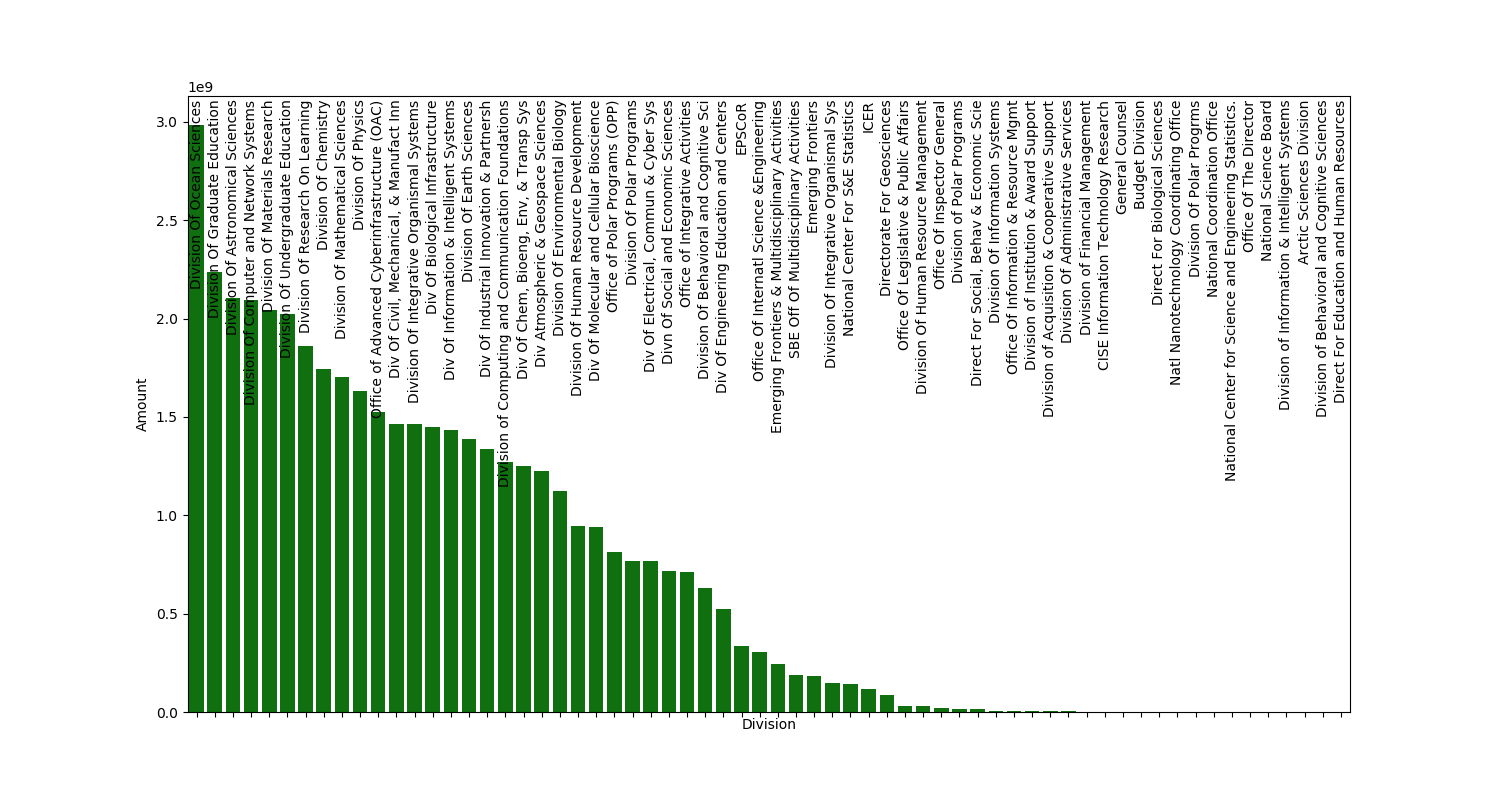

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [20]:
fig110 = plt.figure(110, figsize = (15,8))
ax1 = sns.barplot(x = 'Division', y = 'Amount', data = bydiv, color='Green')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

### Division funding and publications

<IPython.core.display.Javascript object>


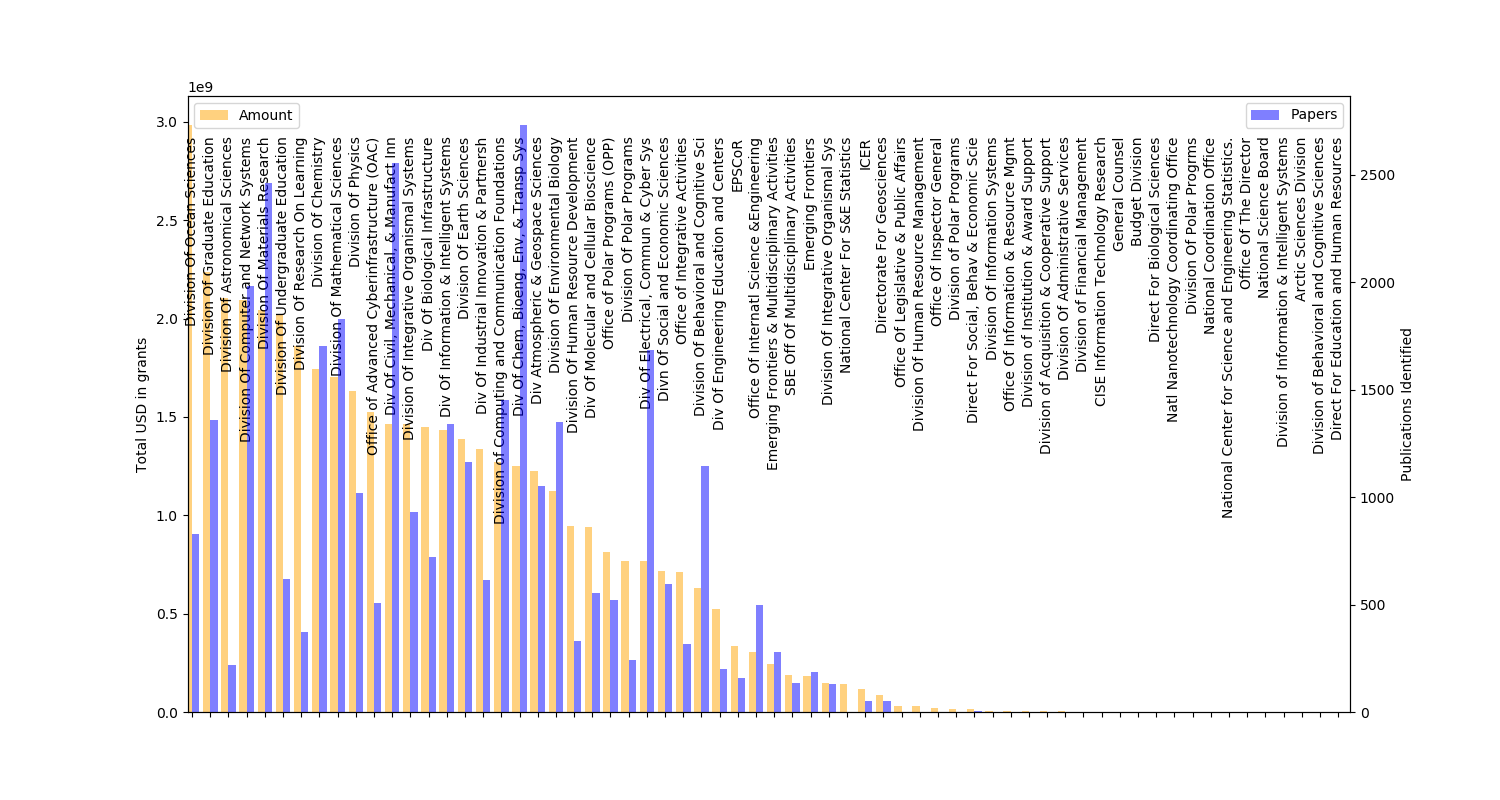

In [21]:
fig111 = plt.figure(111, figsize = (15,8))
ax = fig111.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
#sns.barplot(x = byyearA.index, y = byyearA.values, ax = ax)
#sns.barplot(x = byyearP.index, y = byyearP.values, ax = ax2)
bydiv.Amount.plot(kind='bar', color='orange', ax=ax, width=0.4, position=1,  alpha=0.5)
bydiv.Papers_funded.plot(kind='bar', color='blue', ax=ax2, width=0.4, position=0, alpha=0.5)
ax.set_ylabel('Total USD in grants')
ax2.set_ylabel('Publications Identified')
ax.legend(['Amount'], loc = 2)
ax2.legend(['Papers'], loc = 1)
ax.set_xticklabels(bydiv.Division)
for item in ax.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(0.95)

### Average cost of publication by division

In [22]:
bydiv['Cost'] = bydiv.Amount/bydiv.Papers_funded

In [23]:
bydiv.sort_values(by = 'Cost', inplace=True)

<IPython.core.display.Javascript object>


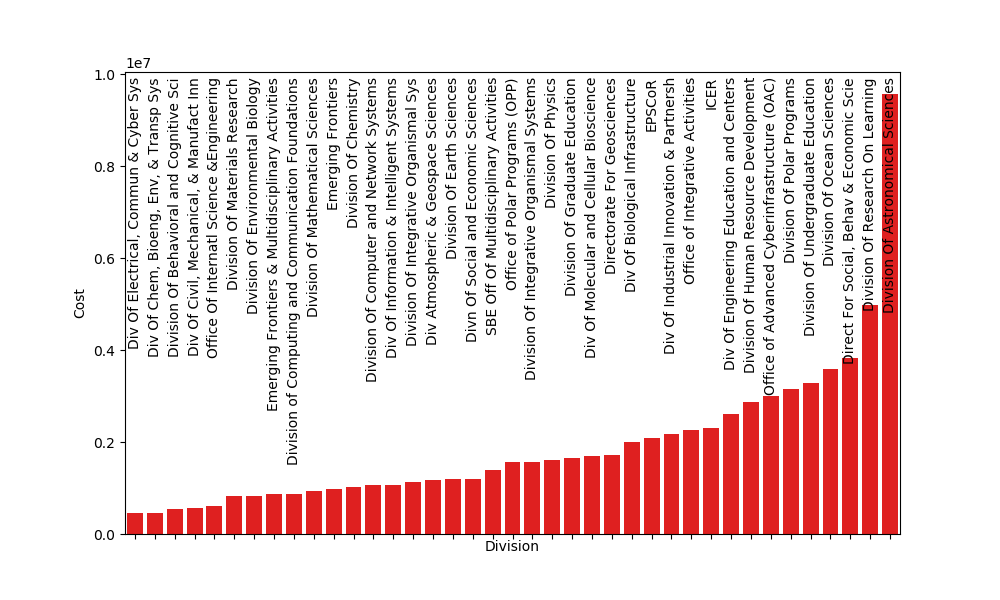

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [24]:
fig103 = plt.figure(112, figsize = (10,6))
ax1 = sns.barplot(x = 'Division', y = 'Cost', data = bydiv[bydiv.Papers_funded > 2], color='Red')
for item in ax1.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

<IPython.core.display.Javascript object>


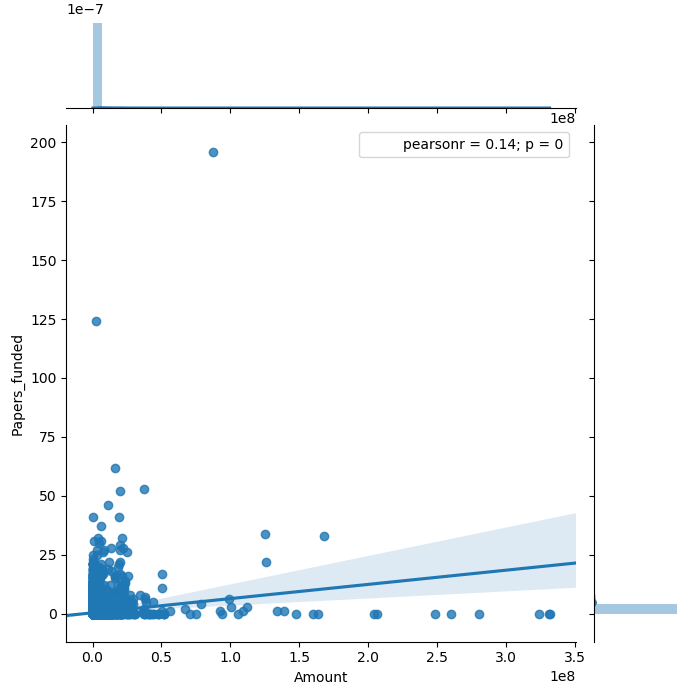

In [25]:
sns.jointplot(x="Amount", y="Papers_funded", data=df, size=7, kind='reg')

<IPython.core.display.Javascript object>


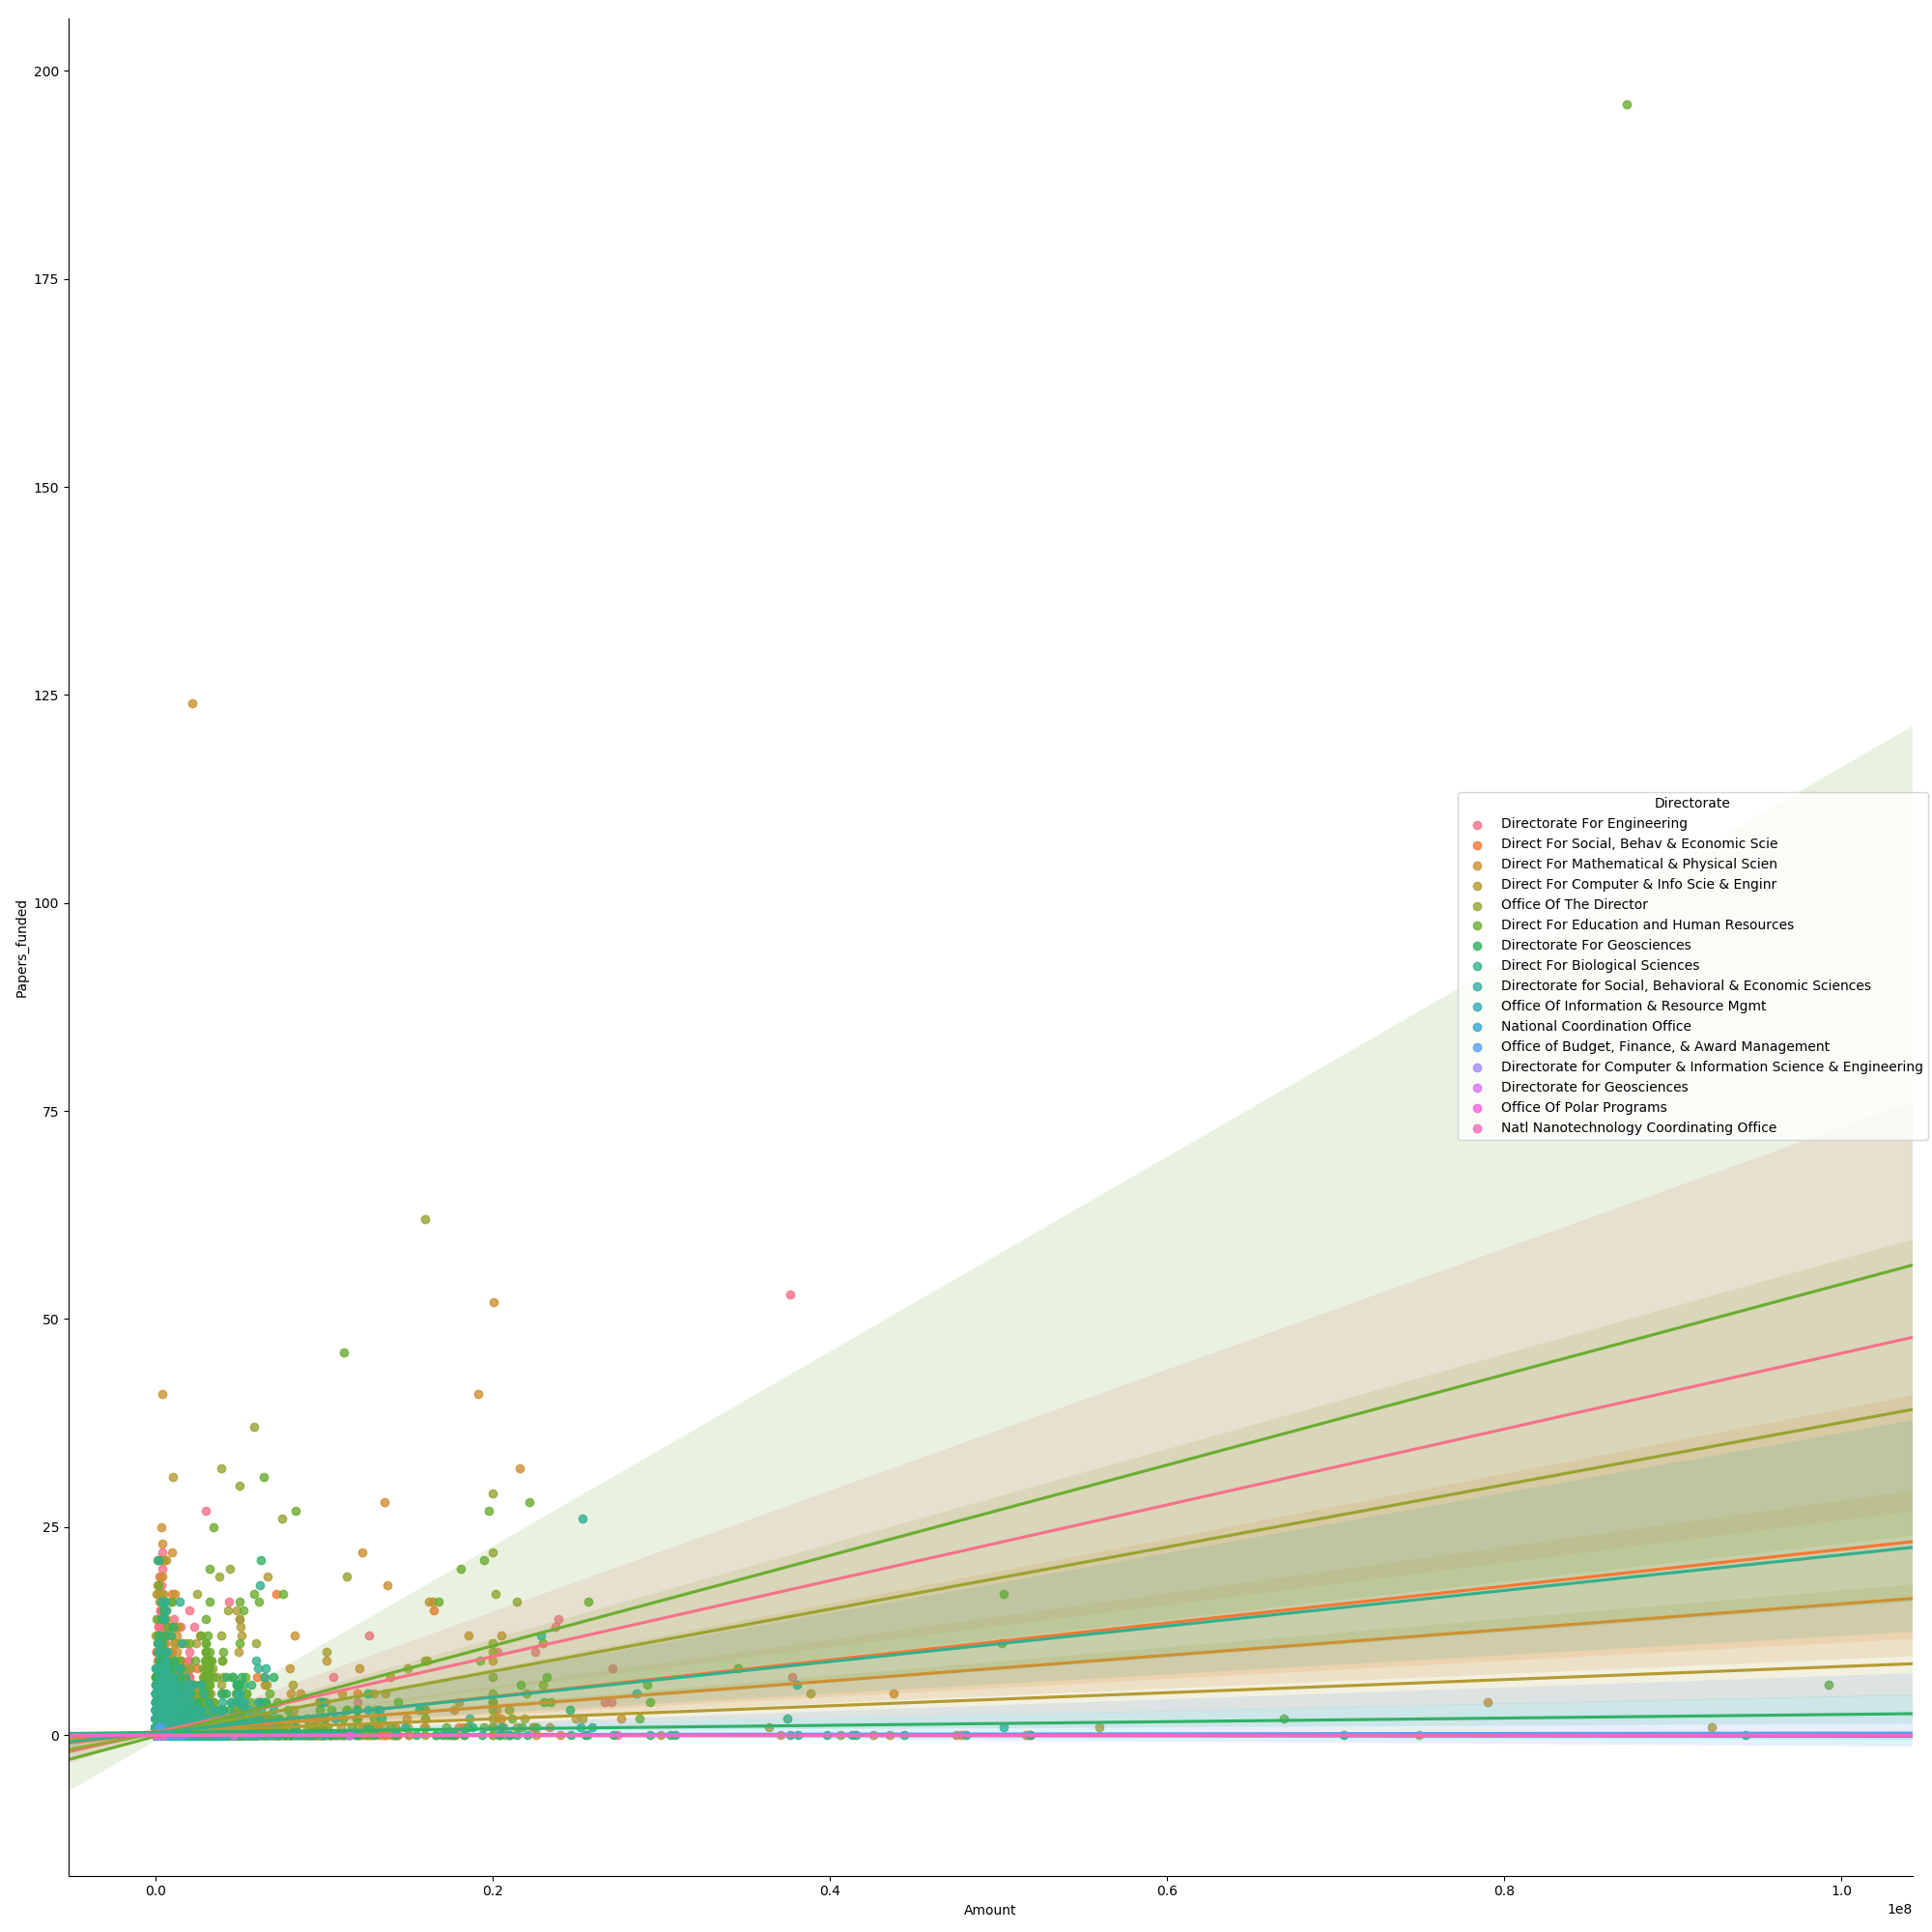

In [26]:
sns.lmplot(x="Amount", y="Papers_funded", data=df[df.Amount < 1e8], hue='Directorate', fit_reg=True, size =20)

<IPython.core.display.Javascript object>


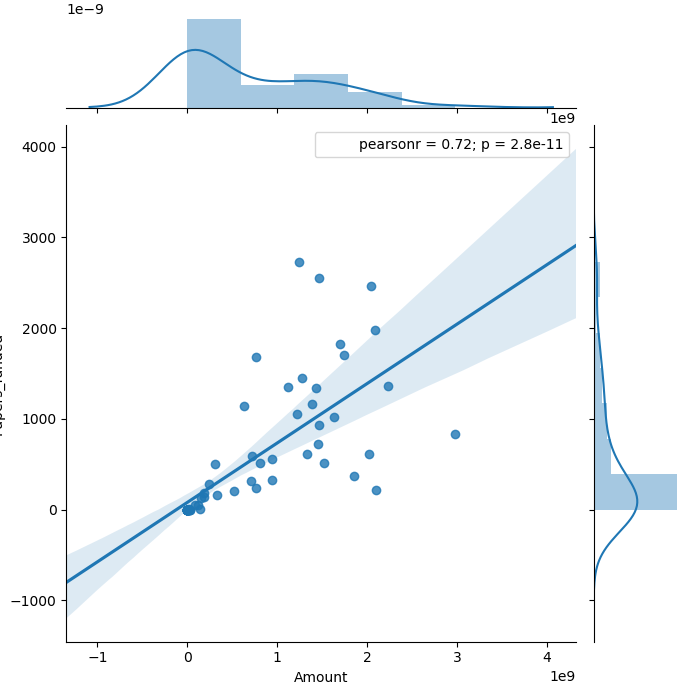

In [27]:
sns.jointplot(x="Amount", y="Papers_funded", data=bydiv, size=7, kind='reg')

## 2. Explore change in time

### Track funding and resulting publications in time

In [28]:
byyearA = df.groupby('Year').Amount.sum()
byyearP = df.groupby('Year').Papers_funded.sum()

<IPython.core.display.Javascript object>


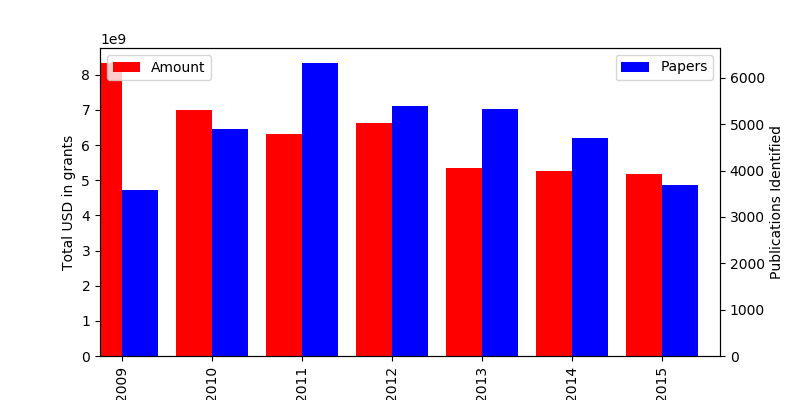

In [29]:
fig200 = plt.figure(200, figsize = (8,4))
ax = fig200.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx()
#sns.barplot(x = byyearA.index, y = byyearA.values, ax = ax)
#sns.barplot(x = byyearP.index, y = byyearP.values, ax = ax2)
byyearA.plot(kind='bar', color='red', ax=ax, width=0.4, position=1)
byyearP.plot(kind='bar', color='blue', ax=ax2, width=0.4, position=0)
ax.set_ylabel('Total USD in grants')
ax2.set_ylabel('Publications Identified')
ax.legend(['Amount'], loc = 2)
ax2.legend(['Papers'], loc = 1)

### Track state funding in time 

In [30]:
byStateYear = pd.DataFrame(df.groupby(["Institution_State", "Year"]).sum()).reset_index()

<IPython.core.display.Javascript object>


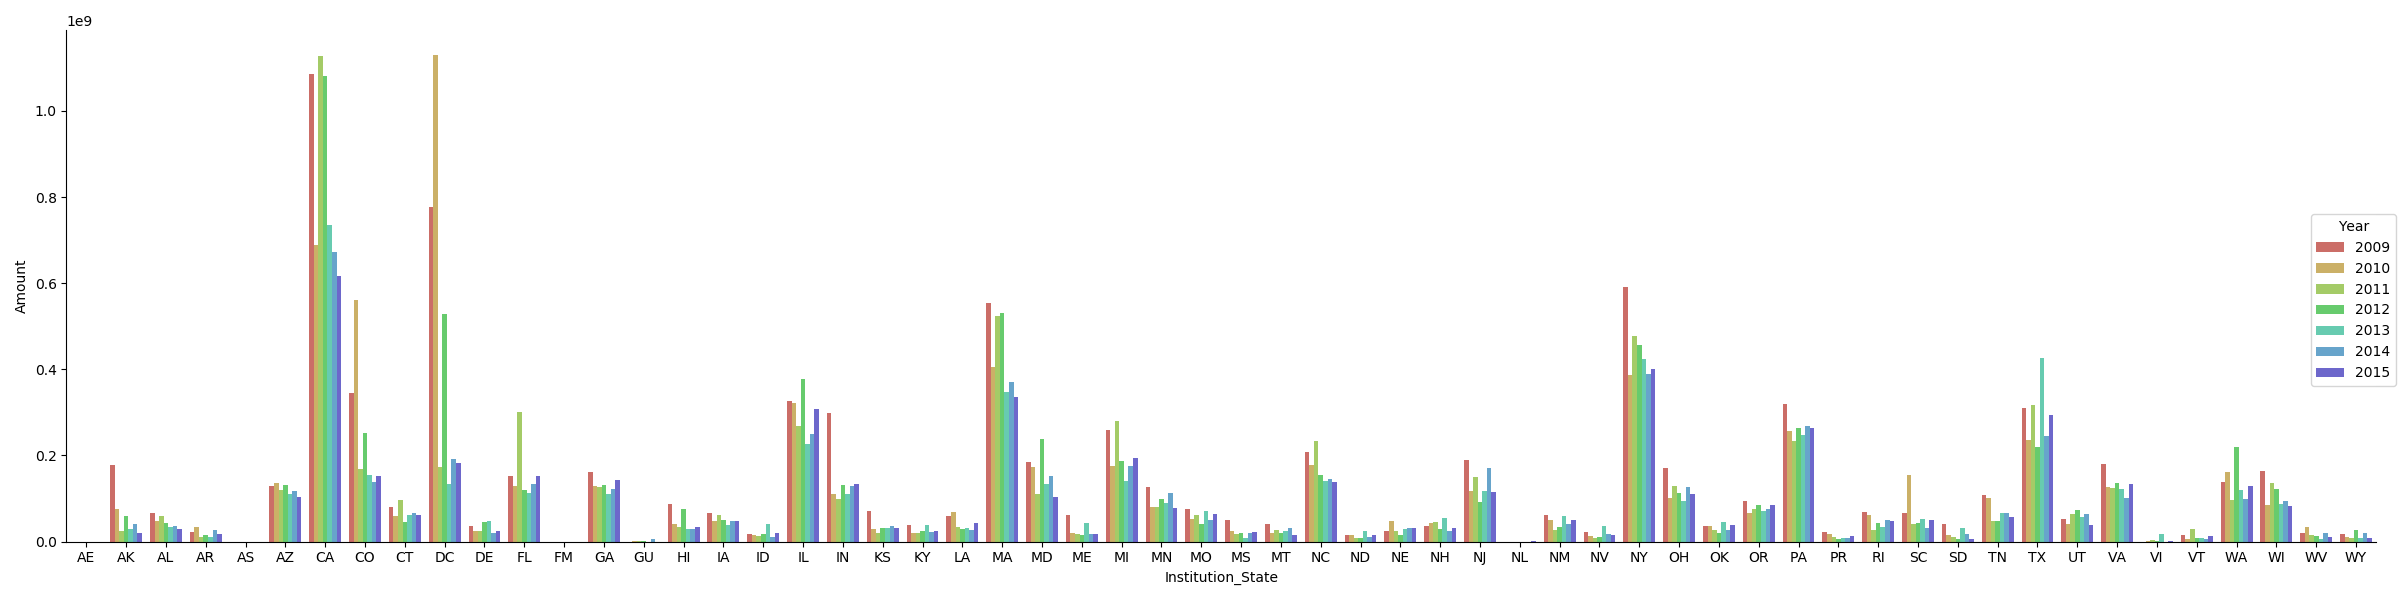

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [31]:
g = sns.factorplot(x="Institution_State", y="Amount", hue="Year", data=byStateYear, kind="bar", palette=sns.color_palette("hls", 9), size = 6, aspect = 4, ci=None)

<IPython.core.display.Javascript object>


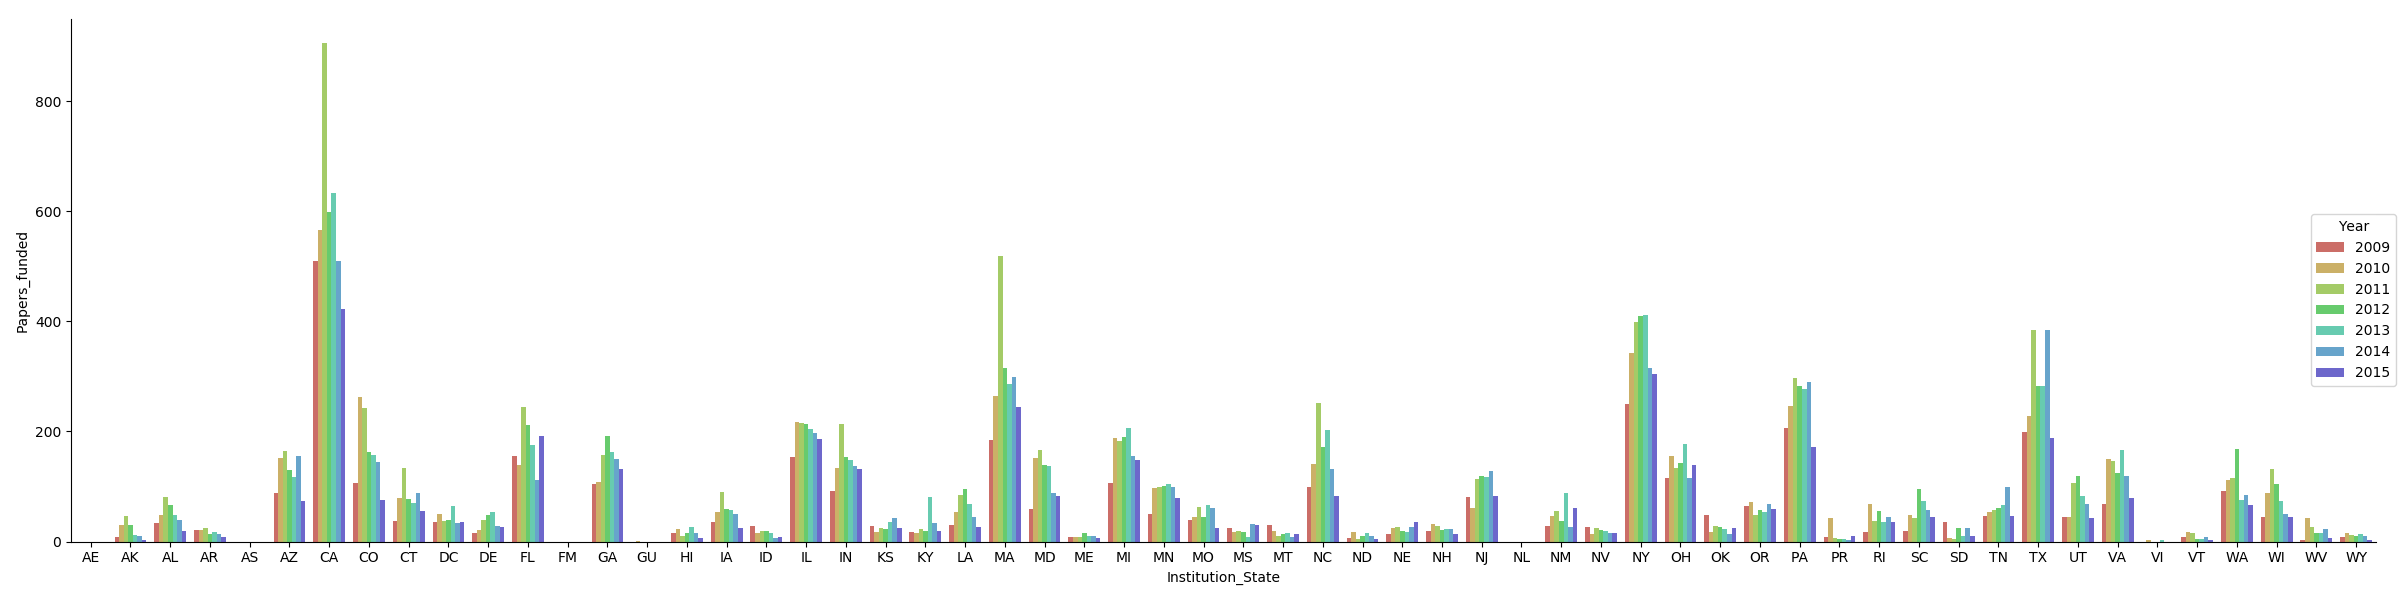

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [32]:
g2 = sns.factorplot(x="Institution_State", y="Papers_funded", hue="Year", data=byStateYear, kind="bar", palette=sns.color_palette("hls", 9), size = 6, aspect = 4, ci=None)

<IPython.core.display.Javascript object>


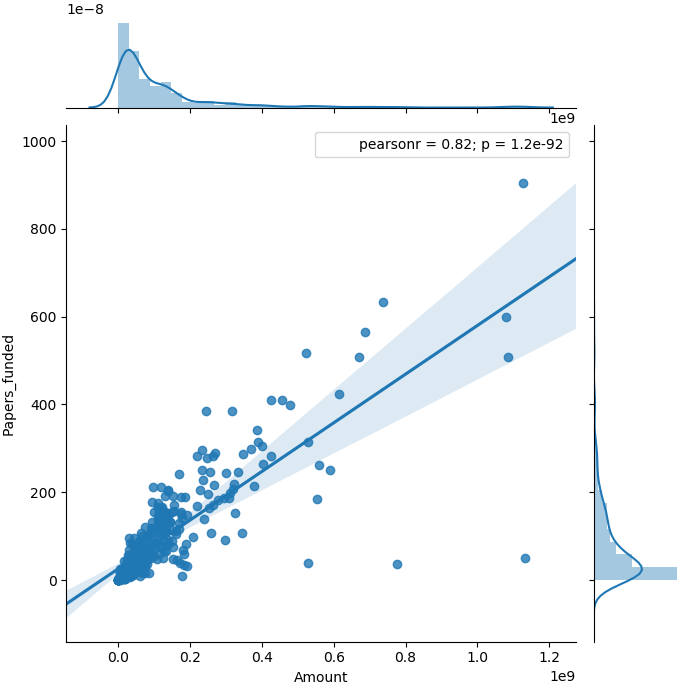

In [33]:
sns.jointplot(x="Amount", y="Papers_funded", data=byStateYear, size=7, kind='reg')

### Institutions 

In [34]:
#find most paid institutions
byInst = df.groupby('Institution_Name').sum()

In [35]:
byInst.sort_values(by = 'Amount', inplace=True, ascending=False)

In [36]:
top50A = byInst[0:50].reset_index()['Institution_Name']

In [37]:
byInstYear = pd.DataFrame(df.groupby(["Institution_Name", "Year"]).sum()).reset_index()

In [38]:
byInstYeartop50A = byInstYear.loc[byInstYear.Institution_Name.isin(top50A)]

In [39]:
byInstYear.sort_values(by = 'Amount', ascending=False, inplace=True)

<IPython.core.display.Javascript object>


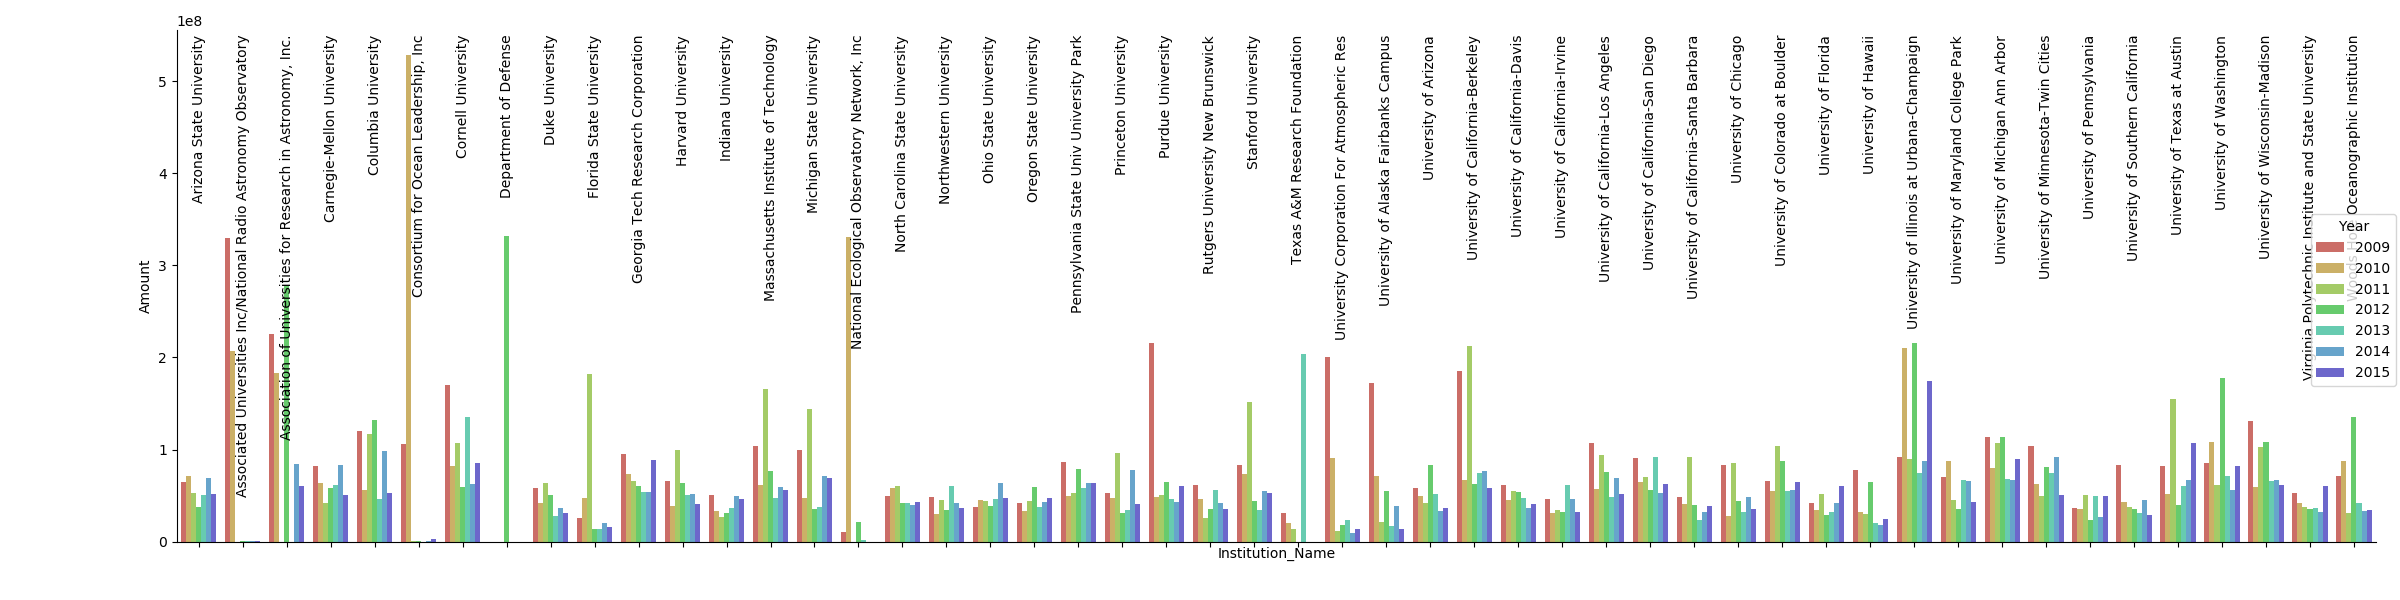

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [40]:
g = sns.factorplot(x="Institution_Name", y="Amount", hue="Year", data=byInstYeartop50A, kind="bar", palette=sns.color_palette("hls", 9), size = 6, aspect = 4, ci=None)
for item in g.ax.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

In [41]:
byInstYear.sort_values(by = 'Papers_funded', ascending=False, inplace=True)

<IPython.core.display.Javascript object>


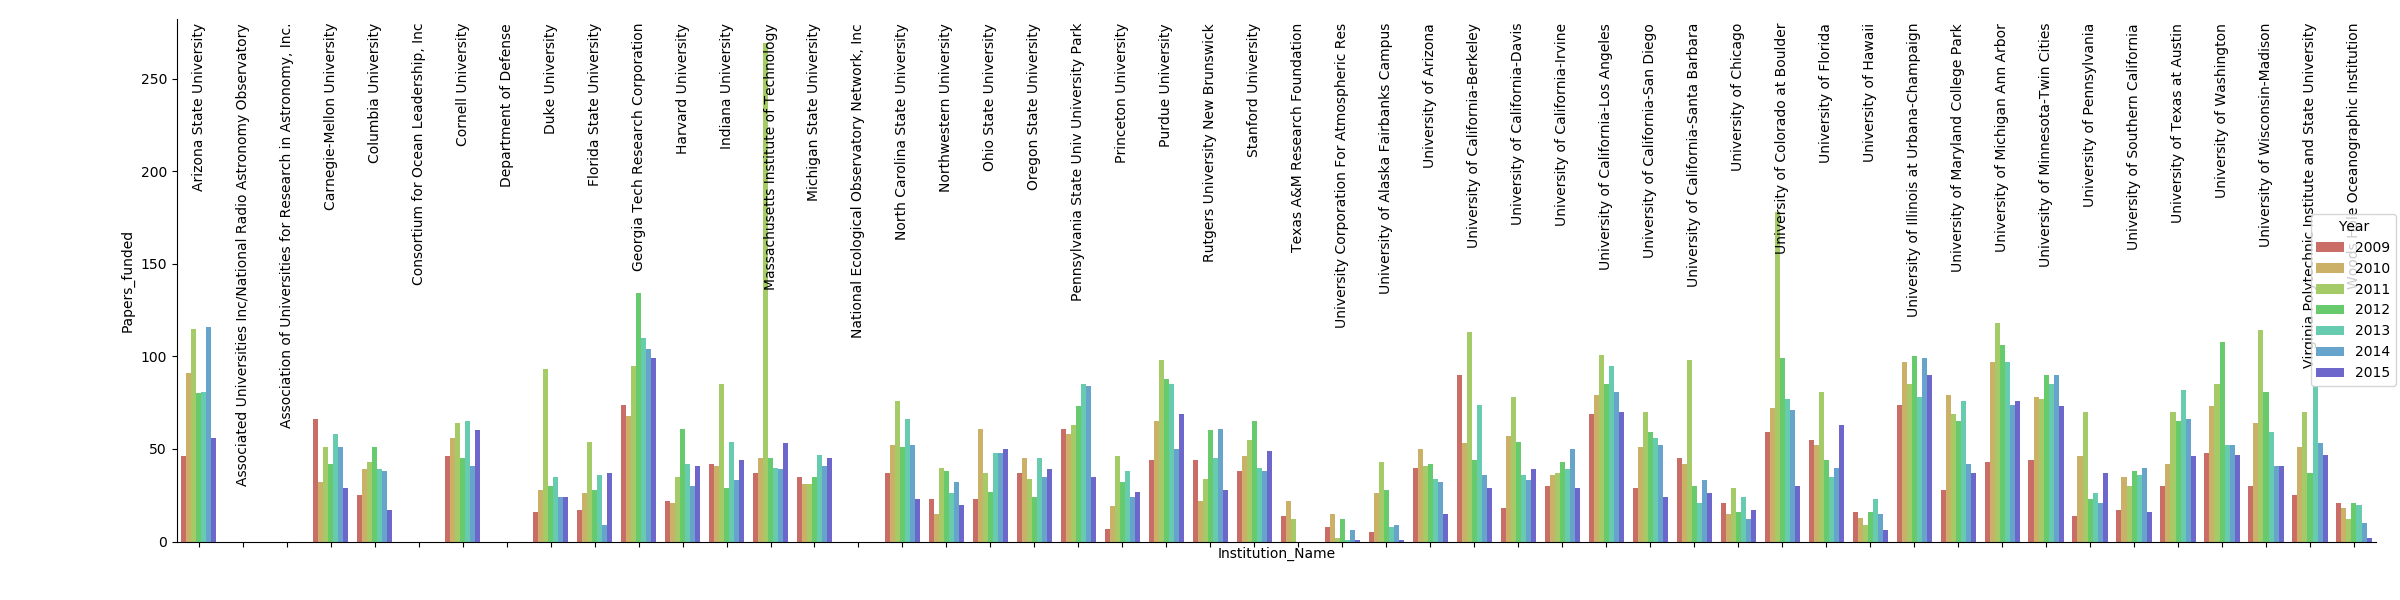

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [42]:
g = sns.factorplot(x="Institution_Name", y="Papers_funded", hue="Year", data=byInstYeartop50A, kind="bar", palette=sns.color_palette("hls", 9), size = 6, aspect = 4, ci=None)
for item in g.ax.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

<IPython.core.display.Javascript object>


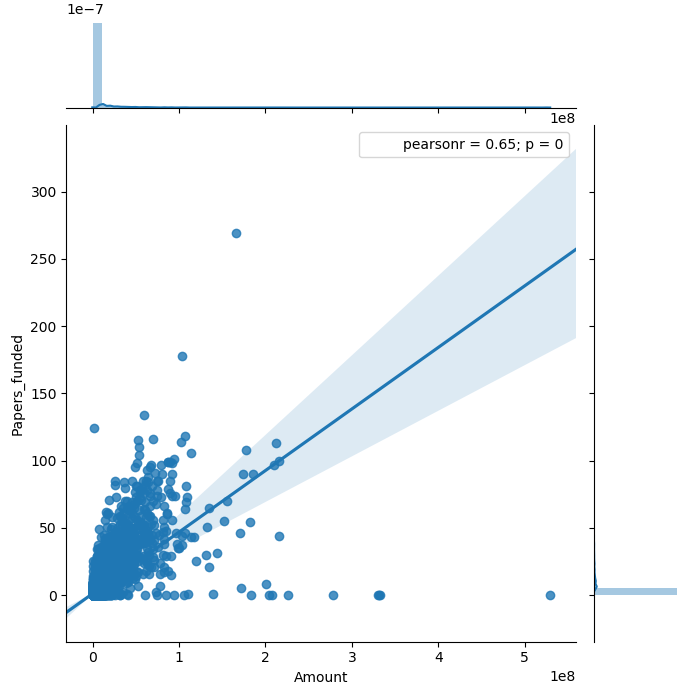

In [43]:
sns.jointplot(x="Amount", y="Papers_funded", data=byInstYear, size=7, kind='reg')

<IPython.core.display.Javascript object>


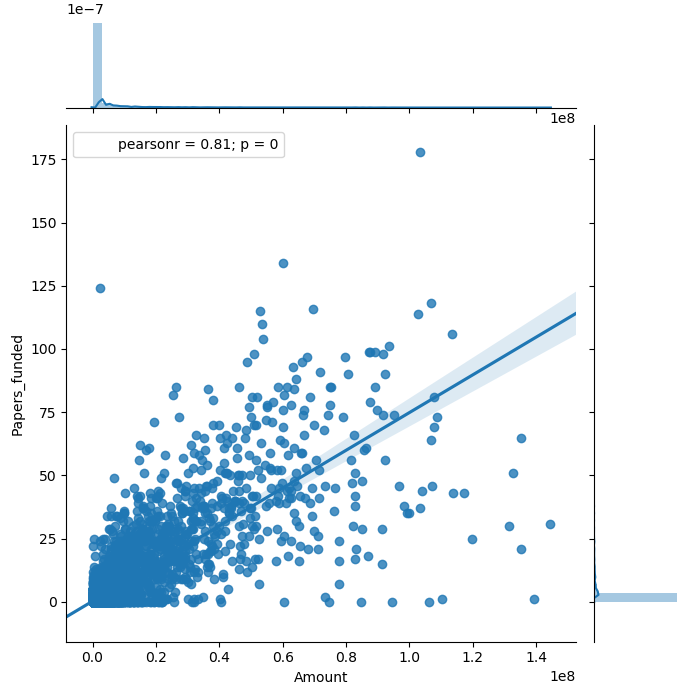

In [44]:
sns.jointplot(x="Amount", y="Papers_funded", data=byInstYear[byInstYear.Amount < 1.5e8], size=7, kind='reg')

## PIs

In [45]:
byPI = df.groupby('PI_name').sum()

In [46]:
byPI.sort_values(by = 'Amount', inplace=True, ascending=False)

In [47]:
top50A_PI = byPI[0:50].reset_index()['PI_name']

In [48]:
byPIYear = pd.DataFrame(df.groupby(["PI_name", "Year"]).sum()).reset_index()

In [49]:
byPIYeartop50A = byPIYear.loc[byPIYear.PI_name.isin(top50A_PI)]

In [50]:
byPIYear.sort_values(by = 'Amount', ascending=False, inplace=True)

<IPython.core.display.Javascript object>


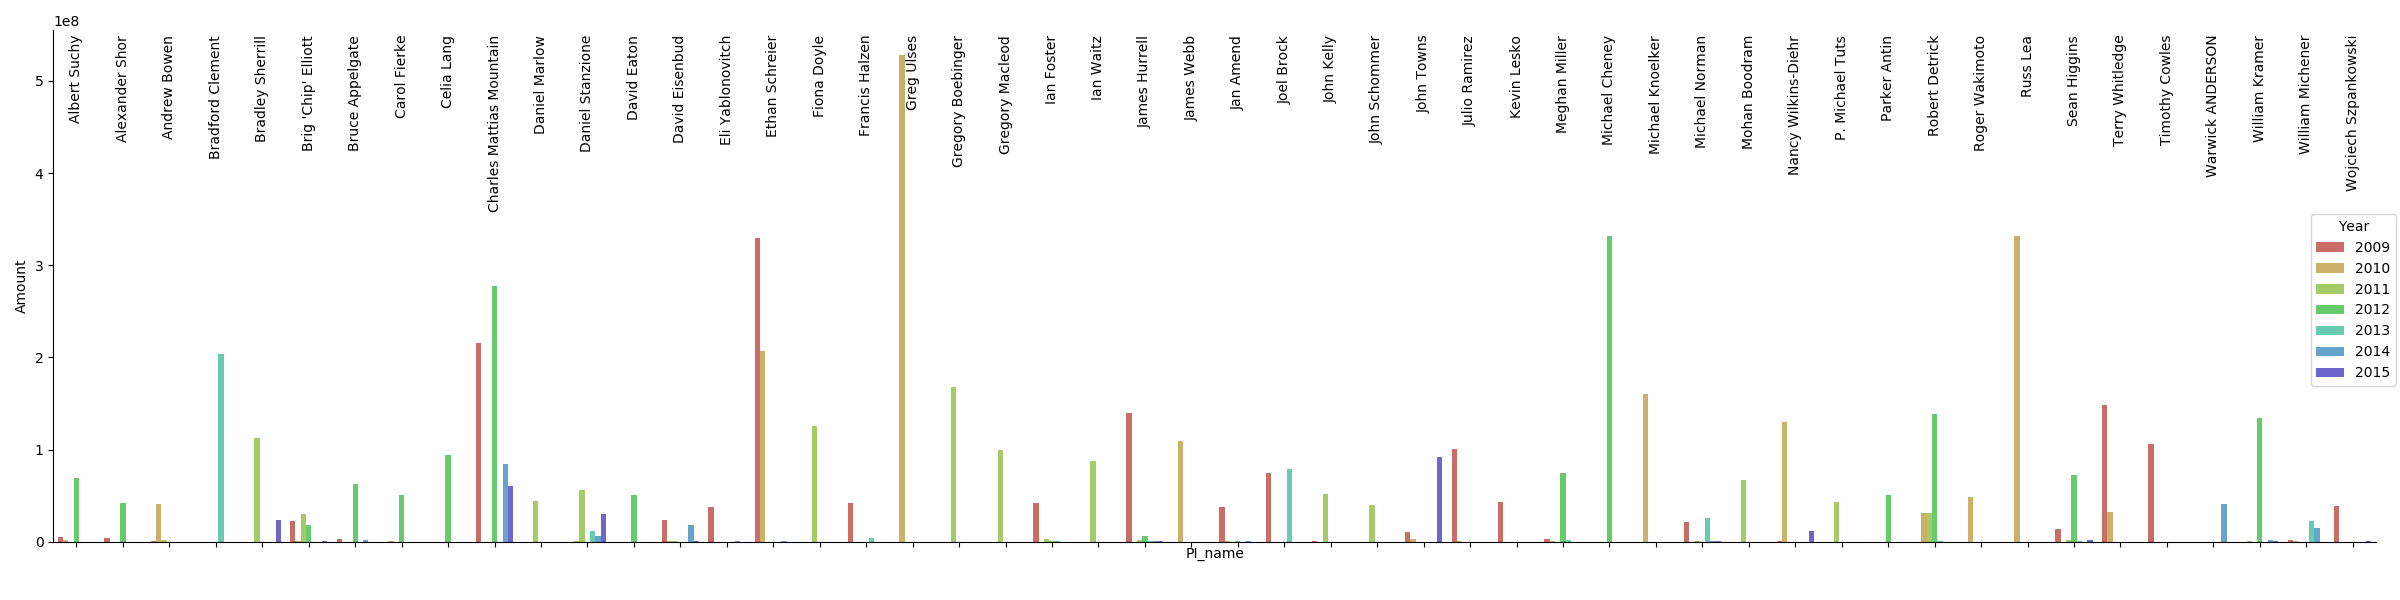

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [51]:
g = sns.factorplot(x="PI_name", y="Amount", hue="Year", data=byPIYeartop50A, kind="bar", palette=sns.color_palette("hls", 9), size = 6, aspect = 4, ci=None)
for item in g.ax.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

In [52]:
byPIYear.sort_values(by = 'Papers_funded', ascending=False, inplace=True)

C:\Users\artem\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


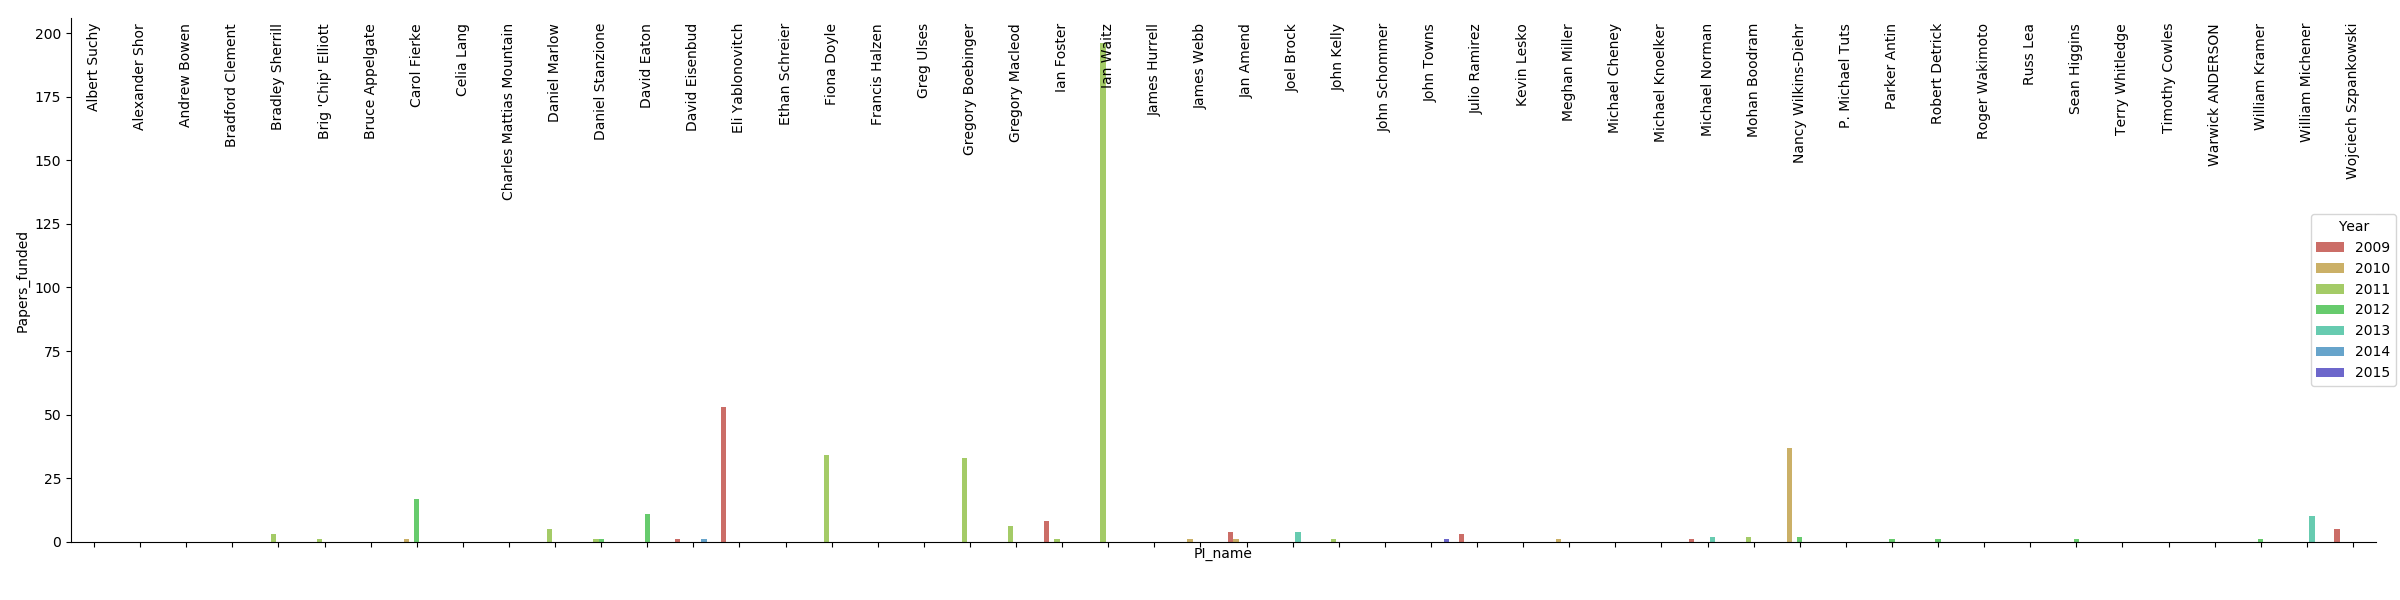

C:\Users\artem\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



In [53]:
g = sns.factorplot(x="PI_name", y="Papers_funded", hue="Year", data=byPIYeartop50A, kind="bar", palette=sns.color_palette("hls", 9), size = 6, aspect = 4, ci=None)
for item in g.ax.get_xticklabels():
    item.set_rotation(90)
    #item.set_verticalalignment('bottom')
    item.set_y(1.01)

C:\Users\artem\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


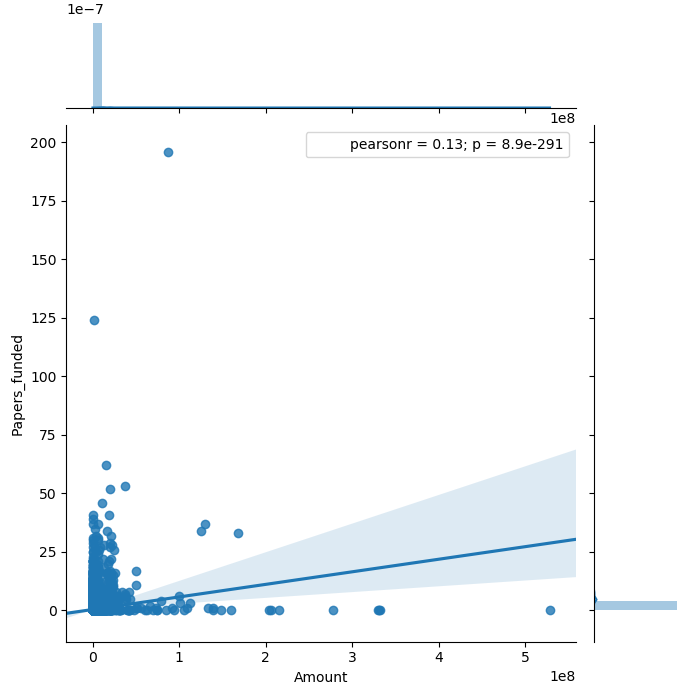

In [54]:
sns.jointplot(x="Amount", y="Papers_funded", data=byPIYear, size=7, kind='reg')

C:\Users\artem\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


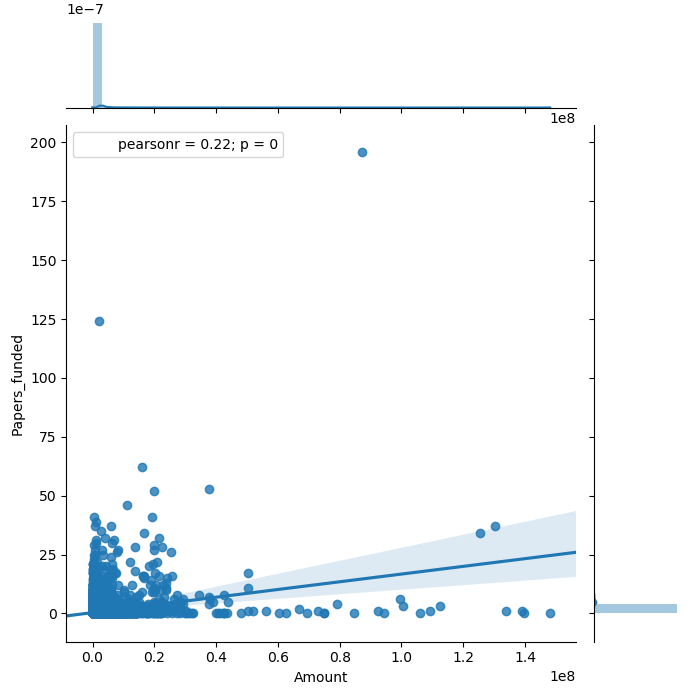

In [55]:
sns.jointplot(x="Amount", y="Papers_funded", data=byPIYear[byPIYear.Amount < 1.5e8], size=7, kind='reg')

## Officers

In [56]:
byPIOff = pd.DataFrame(df.groupby(["PI_name", "Officer"]).count()).reset_index()

In [57]:
byPIOff.sort_values(by = 'Amount', inplace=True, ascending=False)

In [58]:
byPIOff

PI_name                    Officer  Abstract  Amount  \
28559        James Hurrell              Sarah L. Ruth         7      18   
62339         Sean Higgins             James S. Holik        16      16   
44744           Mark Lewis        Bernice T. Anderson         0      15   
58982       Robert Roberts         Ralph A. Gaume Jr.         0      11   
51201       Nicholas Bates             James S. Holik        11      11   
57855     Richard Ricketts             James S. Holik        11      11   
58373       Robert Drennan             John E. Yellen        10      10   
14790          David Clark          Darleen L. Fisher        10      10   
20950     Essandra Collins         Pamela S. McKinley         0      10   
16030        David Stewart              Karen C. Cone        10      10   
75302            none none    Gisele T. Muller-Parker         0      10   
68688      Timothy Deering             James S. Holik        10      10   
16898     Denys Poshyvanyk           Sol J. Greenspan         9       9   
63743   Shun-ichiro Karato             Robin Reichlin         9       9   
14996     David Fisichella             James S. Holik         9       9   
21656       Fillia Makedon         Ephraim P. Glinert         8       8   
72475      William Wilcock             James S. Holik         8       8   
67079          Tamara Berg                   Jie Yang         8       8   
46318      Matthew Lazzara             Peter J. Milne         8       8   
45334     Martin Bridgeman  Joanna Kania-Bartoszynska         8       8   
30460  Jeffrey Freymueller           Eva E. Zanzerkia         7       7   
67620       Thamar Solorio        Tatiana D. Korelsky         7       7   
27415          Itay Neeman         Tomek Bartoszynski         7       7   
64379     Srinivasa Akella          Darleen L. Fisher         7       7   
53681         Paul Villena         Charles D. Zeigler         0       7   
72622     Woody Sutherland             James S. Holik         7       7   
34411        Jonathan Bray        Richard J. Fragaszy         7       7   
29389       Janet Hunziker               Joy Pauschke         7       7   
33761          John O'Shea             John E. Yellen         7       7   
5114   Aranya Chakrabortty       Radhakisan S. Baheti         7       7   
...                    ...                        ...       ...     ...   
26826        Ian Lindevald                 Thomas Kim         1       1   
26828        Ian MacDonald               Matthew Kane         1       1   
26829        Ian Macmillan                Toby Parcel         1       1   
26830         Ian McCubbin              David Lambert         1       1   
26831         Ian McKeague             Nandini Kannan         1       1   
26833       Ian Nettleship         Lynnette D. Madsen         1       1   
26834       Ian Nettleship              Mary M. Toney         1       1   
26835         Ian O'Connor            Anthony Walters         1       1   
26836           Ian Orland           David J. Verardo         1       1   
26837        Ian Papautsky         Lawrence A. Hornak         1       1   
26838        Ian Papautsky              Mona Zaghloul         1       1   
26839        Ian Papautsky              Prakash Balan         1       1   
26840           Ian Pepper              Prakash Balan         1       1   
26842        Ian Robertson               Joy Pauschke         1       1   
26859            Ian White       Shubhra Gangopadhyay         1       1   
26843             Ian Roth            Anthony Walters         1       1   
26844          Ian Shipman            Victor Roytburd         1       1   
26845         Ian Stephens               Anne L. Emig         0       1   
26846         Ian Sullivan               joan schmelz         1       1   
26848            Ian Waitz    Gisele T. Muller-Parker         0       1   
26849           Ian Walker            Abiodun Ilumoka         1       1   
26851           Ian Walker                  

## Compute the time until first publication on grant

In [73]:
#df = df.assign(Grant_Length=None)
grlength = (pd.to_datetime(df.End_Date) - pd.to_datetime(df.Date) )
grdays = grlength.astype('timedelta64[D]')

In [74]:
df.Grant_Length = grdays.astype(int)

In [109]:
3000/30

100.0

In [110]:
bins = np.array(list(range(-3,101) ))

In [111]:
bins = bins*30

C:\Users\artem\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<IPython.core.display.Javascript object>


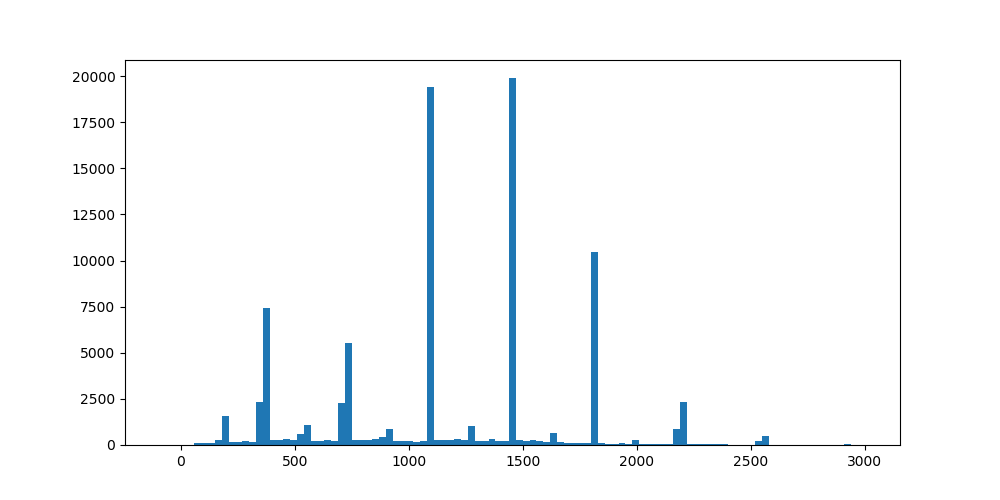

In [113]:
plt.figure(figsize = (10,5))
plt.hist(df.Grant_Length, bins=bins);

In [ ]:
df = df.assign(Time_to_first=None)

for award in df.AwardID:
    startdate = pd.to_datetime(df[df.AwardID == award].Date).values[0]

    #if there are any associated publications
    timetofirst = None
    
    if len(ad[award]) > 0:
        #get all publication times
        pub_times = list()
        for doi in ad[award]:
            dt = pd.to_datetime(ad[award][doi]['created']['date-time'])
            pub_times.append(dt)
        
        #get the first
        pub_times.sort()
        firstpub = pub_times[0]
        
        timetofirst = (firstpub - startdate).days

    df['Time_to_first'].loc[df.AwardID == award] = timetofirst